In [1]:
# Импорт библиотек
import pandas as pd
import re
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
# Чтение файла
data = pd.read_csv('test.csv')
data.rename(columns={'вв': 'id', 'в3': 'date', 'в4': 'employee', 'в5': 'status'}, inplace=True)
data.head()

,id,date,employee,status
0,DTE-68279,25.03.2024 0:00,Глеб Захаров,Добавление ответа на заявку
1,MTF-80103,25.03.2024 0:07,Глеб Захаров,Добавление ответа на заявку
2,MTF-80103,25.03.2024 0:07,Глеб Захаров,"Изменение департамента заявки с ""1-ая линия"" н..."
3,URN-40187,25.03.2024 0:29,Павел Савичев,Добавление ответа на заявку
4,URN-40187,25.03.2024 0:29,Павел Савичев,"Изменение департамента заявки с ""1-ая линия"" н..."


In [3]:
# Сгруппируем все статусы для заявки в одно поле
df = data.groupby(['id','employee'])['status'].apply(list)
df

id         employee         
AAB-31650  Антон Пономарев      [Добавление ответа на заявку, Добавление ответ...
AAB-71201  Артём Акобян         [Добавление ответа на заявку, Добавление ответ...
AAC-32675  Никита Мишин         [Добавление ответа на заявку, Добавление ответ...
AAD-29074  Елизавета Другова                        [Добавление ответа на заявку]
AAE-98037  Даня Александров     [Добавление ответа на заявку, Добавление ответ...
                                                      ...                        
ZZX-46056  Елизавета Другова                        [Добавление ответа на заявку]
ZZY-75845  Вадим Золотанин                          [Добавление ответа на заявку]
           Катя Коренькова                          [Добавление ответа на заявку]
ZZZ-11749  Вадим Золотанин      [Изменение статуса заявки с "Выполнено" на "От...
           Катя Коренькова      [Добавление ответа на заявку, Добавление ответ...
Name: status, Length: 10707, dtype: object

In [4]:
# Оставим тольте те заявки, которые подходят трем условиям "изменение статуса заявки на любой, кроме с Х на Открыто",
# "Добавление ответа на заявку, при условии что у этой заявки нет другого статуса", "Изменение департамента заявки с "1-ая линия" на "2-ая линия""
r = re.compile(r'Изменение статуса заявки с \".+\" на \"(?!.*Открыто).+\"')
df = df.apply(lambda x: (len(set(x).difference({"Добавление ответа на заявку"}))==0) or (('Изменение департамента заявки с "1-ая линия" на "2-ая линия"' in x) or (len((list(filter(r.match, x))))>0)))

In [5]:
# Посчитаем сколько обработанных заявок у каждого работника
df1 = pd.DataFrame(df)
total = df1.groupby('employee')['status'].sum()
total

employee
Алина Гончарук        154
Анатолий Кисилёв      684
Андрей Сливка         445
Антон Пономарев       619
Антон Прасковский     424
Артём Акобян          567
Артём Забиров          77
Вадим Золотанин       485
Влад Шелабодов        382
Глеб Захаров            9
Данила Георгиев       582
Даня Александров      450
Димас Подьянов       1101
Дмитрий Мищенко       254
Елизавета Другова     533
Катя Коренькова      1269
Кирилл Теплов          14
Лиза Кириченко       1008
Максим Лобачёв         39
Максим Шолохов        187
Никита Мишин          411
Никита Новов          630
Павел Савичев         350
Роман Мастынский       15
Сергей Грачёв          15
Name: status, dtype: int64

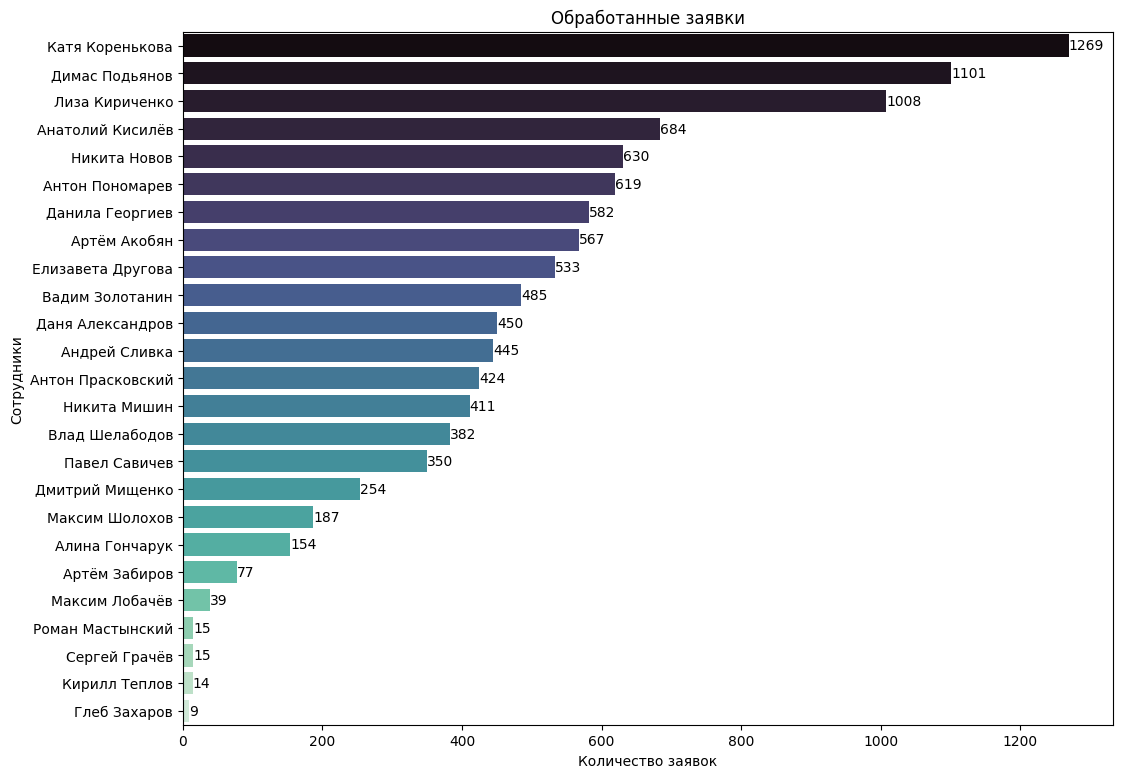

In [6]:
# Для наглядности построим столбчатую диаграмму обработанных заявок
plt.figure(figsize=(12, 9))
ax = sns.barplot(total.reset_index().sort_values('status', ascending=False), y='employee', x='status', orient='h', hue='employee', palette='mako')
plt.title('Обработанные заявки')
plt.xlabel('Количество заявок')
plt.ylabel('Сотрудники')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [7]:
# Отсортируем заявки по дате и времени обработки
work_time = data[['employee', 'date']].sort_values('date')
work_time

,employee,date
0,Глеб Захаров,25.03.2024 0:00
1,Глеб Захаров,25.03.2024 0:07
2,Глеб Захаров,25.03.2024 0:07
3,Павел Савичев,25.03.2024 0:29
4,Павел Савичев,25.03.2024 0:29
...,...,...
27010,Андрей Сливка,28.03.2024 9:58
27014,Андрей Сливка,28.03.2024 9:58
27017,Андрей Сливка,28.03.2024 9:59
27015,Андрей Сливка,28.03.2024 9:59


In [8]:
# Переведем дату в нужный формат и добавим столбец только с датой
work_time['date'] = pd.to_datetime(work_time['date'])
work_time["only_date"] = [d.date() for d in work_time["date"]]

In [9]:
#hour = work_time.groupby('employee')['date'].apply(lambda x: (x.max() - x.min())) / np.timedelta64(1, 'h')

In [10]:
# Посмотрим сколько часов работали сотрудники в каждый из их рабочих дней
hour = work_time.groupby(['employee', 'only_date'])['date'].apply(lambda x: (x.max() - x.min()))
hour

employee           only_date 
Алина Гончарук     2024-03-25   0 days 03:45:00
                   2024-03-26   0 days 02:33:00
                   2024-03-27   0 days 02:23:00
                   2024-03-28   0 days 01:00:00
Анатолий Кисилёв   2024-03-26   0 days 01:00:00
                   2024-03-27   0 days 09:52:00
Андрей Сливка      2024-03-26   0 days 00:51:00
                   2024-03-27   0 days 11:01:00
                   2024-03-28   0 days 09:57:00
Антон Пономарев    2024-03-25   0 days 09:39:00
                   2024-03-26   0 days 12:21:00
Антон Прасковский  2024-03-25   0 days 07:23:00
                   2024-03-28   0 days 03:17:00
Артём Акобян       2024-03-26   0 days 11:56:00
                   2024-03-27   0 days 11:52:00
Артём Забиров      2024-03-25   0 days 03:27:00
                   2024-03-26   0 days 10:30:00
                   2024-03-28   0 days 01:01:00
Вадим Золотанин    2024-03-25   0 days 04:35:00
                   2024-03-26   0 days 00:56:00
          

In [11]:
# Посмотрим сколько всего часов работали сотрудники, часы указаны в долях часа
secs = hour.apply(lambda x: x.total_seconds()).reset_index().groupby(['employee'])['date'].sum()/3600
secs

employee
Алина Гончарук        9.683333
Анатолий Кисилёв     10.866667
Андрей Сливка        21.816667
Антон Пономарев      22.000000
Антон Прасковский    10.666667
Артём Акобян         23.800000
Артём Забиров        14.966667
Вадим Золотанин      40.833333
Влад Шелабодов       20.216667
Глеб Захаров         14.650000
Данила Георгиев      22.100000
Даня Александров     16.966667
Димас Подьянов       14.616667
Дмитрий Мищенко      11.966667
Елизавета Другова    16.833333
Катя Коренькова      58.050000
Кирилл Теплов         1.400000
Лиза Кириченко       16.583333
Максим Лобачёв        3.116667
Максим Шолохов       11.200000
Никита Мишин         24.100000
Никита Новов         15.666667
Павел Савичев        39.150000
Роман Мастынский      1.066667
Сергей Грачёв         0.850000
Name: date, dtype: float64

In [12]:
#secs.reset_index()

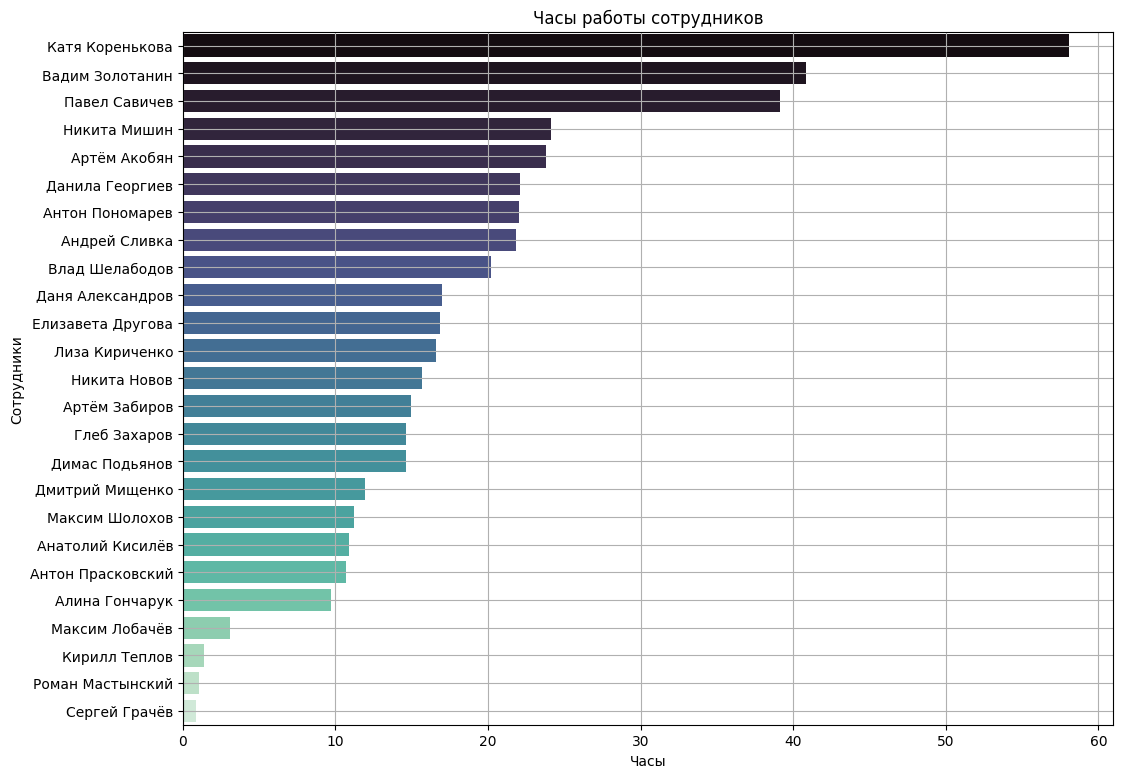

In [13]:
# Построим столбачатую диаграмму
plt.figure(figsize=(12, 9))
ax = sns.barplot(secs.reset_index().sort_values('date', ascending=False), y='employee', x='date', palette='mako')
plt.title('Часы работы сотрудников')
plt.xlabel('Часы')
plt.ylabel('Сотрудники')
plt.grid()
plt.show()

In [14]:
# Посчитаем эффективность сотрудников как отношение количества обработанных заявок к рабочим часам
eff = total / secs
eff

employee
Алина Гончарук       15.903614
Анатолий Кисилёв     62.944785
Андрей Сливка        20.397250
Антон Пономарев      28.136364
Антон Прасковский    39.750000
Артём Акобян         23.823529
Артём Забиров         5.144766
Вадим Золотанин      11.877551
Влад Шелабодов       18.895301
Глеб Захаров          0.614334
Данила Георгиев      26.334842
Даня Александров     26.522593
Димас Подьянов       75.324971
Дмитрий Мищенко      21.225627
Елизавета Другова    31.663366
Катя Коренькова      21.860465
Кирилл Теплов        10.000000
Лиза Кириченко       60.783920
Максим Лобачёв       12.513369
Максим Шолохов       16.696429
Никита Мишин         17.053942
Никита Новов         40.212766
Павел Савичев         8.939974
Роман Мастынский     14.062500
Сергей Грачёв        17.647059
dtype: float64

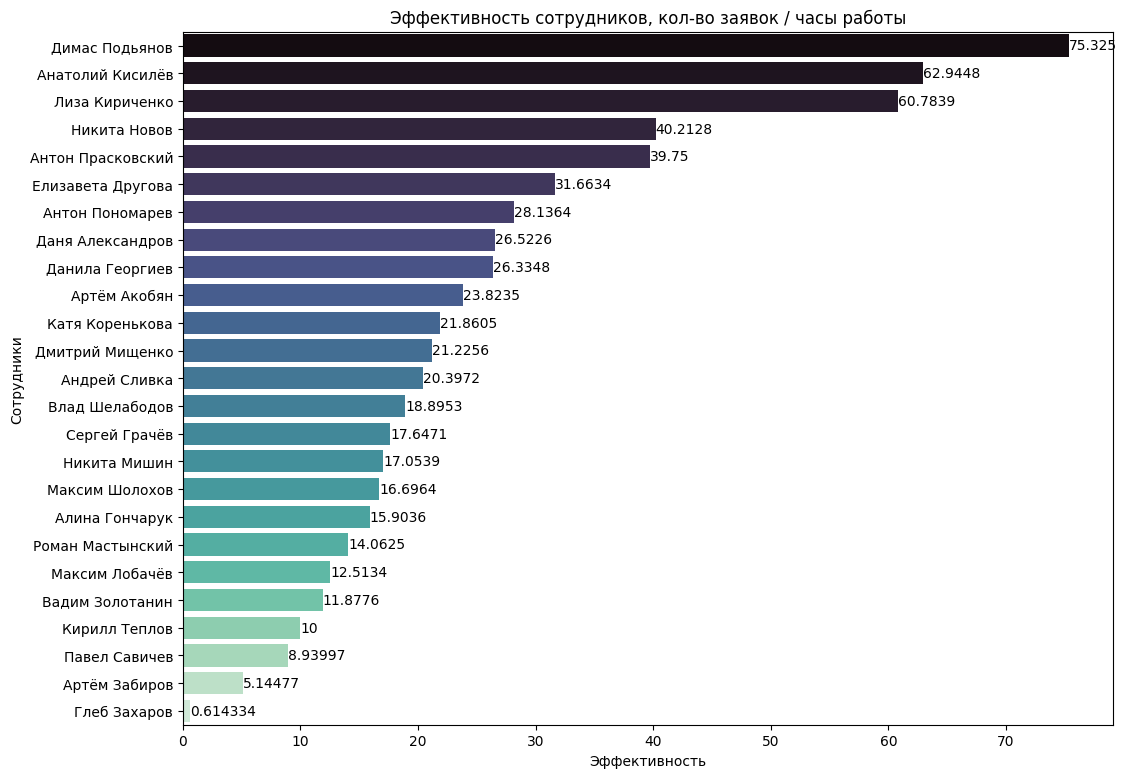

In [15]:
# Построим столбачатую диаграмму
plt.figure(figsize=(12, 9))
ax = sns.barplot(eff.reset_index().sort_values(0, ascending=False), y='employee', x=0, orient='h', hue='employee', palette='mako')
plt.title('Эффективность сотрудников, кол-во заявок / часы работы')
plt.xlabel('Эффективность')
plt.ylabel('Сотрудники')
for i in ax.containers:
    ax.bar_label(i,)

Вывод: Эффективность сотрудников наглядно показывает кто из сотрудников продуктивен. Например, Димас Подьянов и Глеб Захаров работали одинаковое количество часов, но эффективность на совершенно разных уровнях. Можно выделить 5 самых продуктивных сотрудников:
1. Димас Подьянов
2. Анатолий Кисилёв
3. Лиза Кириченко
4. Никита Новов
5. Антон Прасковский